In [1]:
import matplotlib; matplotlib.rc('font', size=14)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from collections import Counter

In [2]:
df = pd.read_csv(
    'https://sites.astro.caltech.edu/ztf/bts/explorer.php?f=s&subsample=sn&classstring=&classexclude=&showdiscdate=y&ztflink=lasair&lastdet=&startsavedate=&startpeakdate=&startra=&startdec=&startz=&startdur=&startrise=&startfade=&startpeakmag=&startabsmag=&starthostabs=&starthostcol=&startb=&startav=&endsavedate=&endpeakdate=&endra=&enddec=&endz=&enddur=&endrise=&endfade=&endpeakmag=&endabsmag=&endhostabs=&endhostcol=&endb=&endav=&format=csv',
)
df['discdate'] = pd.to_datetime(df['discdate'])

2018-03-01 00:00:00, count=1012 +- 32.0
2019-03-01 00:00:00, count=1753 +- 42.0


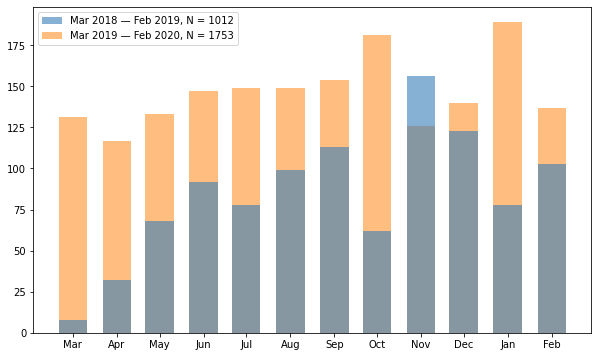

In [3]:
counter = Counter()
counter.update(datetime(d.year, d.month, 1) for d in df['discdate'])
year = timedelta(days=365)
plt.figure(figsize=(10, 6))
colors = ['#377eb8', '#ff7f00']
for i, dt1 in enumerate([datetime(2018, 3, 1), datetime(2019, 3, 1)]):
    dt2 = dt1 + year
    dates, counts = zip(*((date - year * (dt1.year == 2019), count)
                        for date, count in counter.items() if dt1 <= date < dt2))
    tot_counts = sum(counts)
    print(f'{dt1}, count={tot_counts} +- {np.round(np.sqrt(tot_counts))}')
    plt.bar(dates, counts, width=20, alpha=0.6 - i*0.1, zorder=-i, color=colors[i],
            label=f'Mar {dt1.year} — Feb {dt2.year}, N = {tot_counts}')
plt.xticks([datetime(2018, i, 1) for i in range(3, 13)] + [datetime(2019, i, 1) for i in range(1, 3)],
           ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
plt.legend()
plt.savefig('bts-chart.pdf')